# Introducción a Modelos Estadísticos

## Ejemplo 1

Inicializamos las librerías:

In [57]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm


# Set seed for reproducibility
np.random.seed(157017)


Para una v.a. $X\sim \mathrm{exp}$, graficamos la función de densidad para distintas tasas $\lambda = 5, 2, 0.5$.


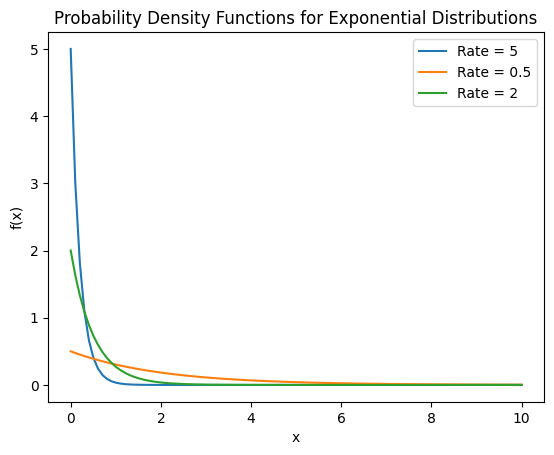

In [58]:
x = np.linspace(0, 10, 100)

# PDFs for exponential distributions with different rates
y1 = 5 * np.exp(-5 * x)
y2 = 0.5 * np.exp(-0.5 * x)
y3 = 2 * np.exp(-2 * x)

# Plot the PDFs
plt.plot(x, y1, label='Rate = 5')
plt.plot(x, y2, label='Rate = 0.5')
plt.plot(x, y3, label='Rate = 2')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Probability Density Functions for Exponential Distributions')
plt.legend()

# Show the plot
plt.show()

Ahora, graficamos las respectivas funciones de distribución de $X$.


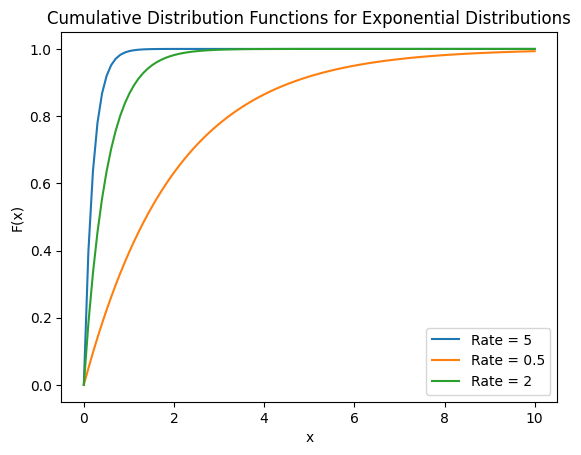

In [59]:

# CDFs for exponential distributions with different rates
f1 = expon.cdf(x, scale=1/5)
f2 = expon.cdf(x, scale=1/0.5)
f3 = expon.cdf(x, scale=1/2)

# Plot the CDFs
plt.plot(x, f1, label='Rate = 5')
plt.plot(x, f2, label='Rate = 0.5')
plt.plot(x, f3, label='Rate = 2')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative Distribution Functions for Exponential Distributions')
plt.legend()

# Show the plot
plt.show()


Para $\lambda=0.5$, simulamos una muestra aleatoria de tamaño $n=100$ datos de $X$.

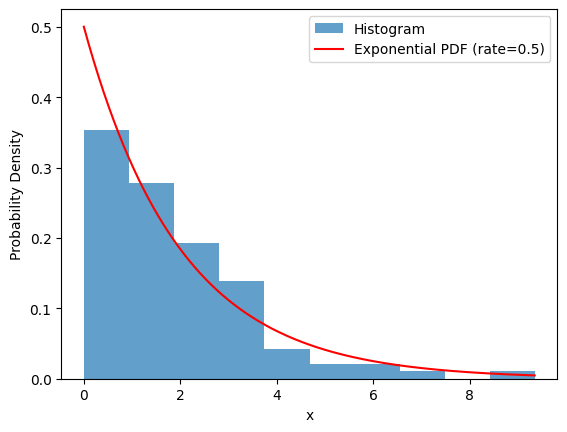

In [60]:
n = 100
z = np.random.exponential(scale=1/0.5, size=n)


# Plot histogram
plt.hist(z, bins='fd', density=True, alpha=0.7, label='Histogram')

# Overlay with the PDF of the exponential distribution
x_vals = np.linspace(0, max(z), 1000)
pdf_vals = expon.pdf(x_vals, scale=1/0.5)
plt.plot(x_vals, pdf_vals, 'r-', label='Exponential PDF (rate=0.5)')

# Set labels and legend
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()



Ordenamos los puntos simulados en $x_{(1)},x_{(2)}, \ldots, x_{(n)}$. Les asociamos $k_i$ definido por

$$
k_i = \frac{i}{n+1}
$$

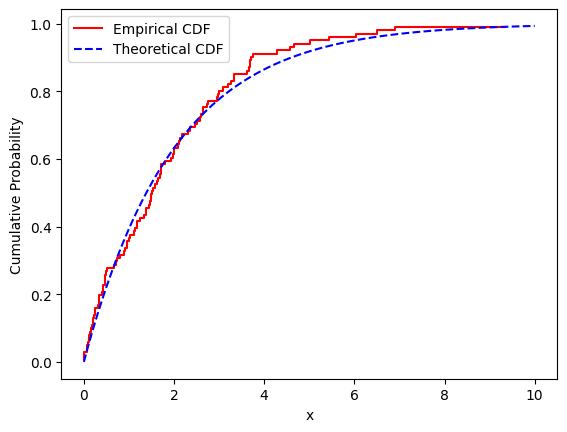

In [61]:
# Sort the simulated data
z2 = np.sort(z)

# Initialize k = i / (n + 1)
k = np.arange(1, n + 1) / (n + 1)


# Plot z2 against k
plt.step(z2, k, color="red", linestyle="-", label="Empirical CDF")

# Overlay the theoretical density function f2
plt.plot(x, expon.cdf(x, scale=1/0.5), color="blue", linestyle="--", label="Theoretical CDF")

# Add labels and legend
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.legend()

# Show the plot
plt.show()


Para conocer más sobre la función de distribución empírica, pueden consultar [Wikipedia](https://en.wikipedia.org/wiki/Empirical_distribution_function).

# Ejemplo 2
Una variable aleatoria discreta $X$ tiene función de masa de probabilidad:
$$
\begin{array}{cccccc}{x} & {0} & {1} & {2} & {3} & {4} \\ \hline p(x) & {0.1} & {0.2} & {0.2} & {0.2} & {0.3}\end{array}
$$
Utilicen el teorema de la transformación inversa para generar una muestra aleatoria de tamaño 1000 de la distribución de $X$. Construyan una tabla de frecuencias relativas y comparen las probabilidades empíricas con las teóricas.\\
Repitan considerando la función de R sample.

In [62]:
prob = [0.1, 0.3, 0.5, 0.7, 1]
frec = np.histogram(np.random.uniform(size=1000), bins=np.cumsum(prob))[0] / 1000

np.random.seed(157017)
frecSample = np.histogram(np.random.choice(np.arange(5), size=1000, replace=True, p=[0.1, 0.2, 0.2, 0.2, 0.3]))[0] / 1000

print(f"Ejemplo 2:\n{frec}")
print(f"Ejemplo 2 (using sample):\n{frecSample}")

Ejemplo 2:
[0.295 0.505 0.093 0.   ]
Ejemplo 2 (using sample):
[0.108 0.    0.192 0.    0.    0.186 0.    0.206 0.    0.308]


# Ejemplo 3
Obtengan una muestra de $10,000$ números de la siguiente distribución discreta:
$$
p(x)=\frac{2 x}{k(k+1)}, x=1,2, \ldots, k
$$
para $k=100$

In [63]:
def p(n):
    values = np.random.choice(np.arange(1, 101), size=n, replace=True)
    prob = (2 * values) / (100 * 101)
    return prob

print("\nEjemplo 3:")
print(p(10000)[:30])


Ejemplo 3:
[0.00534653 0.01940594 0.00712871 0.0019802  0.01782178 0.00554455
 0.01584158 0.0029703  0.00613861 0.01267327 0.00871287 0.01089109
 0.00910891 0.01168317 0.01207921 0.01247525 0.01544554 0.01584158
 0.01980198 0.01762376 0.01742574 0.00039604 0.01643564 0.00415842
 0.00792079 0.01287129 0.00871287 0.00772277 0.01940594 0.00950495]


# Ejemplo 4
Una compañía de seguros tiene 1000 asegurados, cada uno de los cuales presentará de manera independiente una reclamación en el siguiente mes con probabilidad $p = 0.09245$. Suponiendo que las cantidades de los reclamos hechos son variables aleatorias Gamma(7000,1), hagan simulación para estimar la probabilidad de que la suma de los reclamos exceda $\$ 500,000$.

In [64]:
mayor = sum(np.sum(np.random.binomial(1, 0.09245, 1000)) for _ in range(10000))
montos = sum(np.sum(np.random.gamma(7000, 1, reclamaciones)) for reclamaciones in np.random.binomial(1000, 0.09245, 10000))
result = mayor / 10000
print(f"\nEjemplo 4:\n{result}")


Ejemplo 4:
92.3829


# Tarea 3

# Ejercicio 1
Simula las siguientes muestras Poisson, todas con $\lambda = 3$, pero de distintos tamaños, $n = 10,20,40,80,200$. Para cada muestra de estas tres calcula los tres estimadores de momentos dados en las notas en la pág. 3, $\lambda_1 , \lambda_2$ y $\lambda_3$ .

In [65]:
def est1(x):
    return np.mean(x)

def est2(x):
    n = len(x)
    return np.sum((x - np.mean(x))**2) / n

def est3(x):
    n = len(x)
    return -0.5 + np.sqrt(0.25 + np.sum(x**2) / n)

In [66]:
lambda_val = 3
n_values = [10, 20, 40, 80, 200]

for n in n_values:
    x = np.random.poisson(lambda_val, n)
    e1 = est1(x)
    e2 = est2(x)
    e3 = est3(x)
    print(f"n = {n:3} | est1: {e1:.3f}, est2: {e2:.3f}, est3: {e3:.3f}")

n =  10 | est1: 3.100, est2: 2.290, est3: 2.986
n =  20 | est1: 3.200, est2: 2.560, est3: 3.112
n =  40 | est1: 3.000, est2: 2.500, est3: 2.928
n =  80 | est1: 2.850, est2: 3.027, est3: 2.876
n = 200 | est1: 3.045, est2: 2.423, est3: 2.956


# Ejercicio 2
Simula una muestra de $n = 15$ variables aleatorias independientes $X_1, ..., X_n$, idénticamente distribuidas como normales con media $\mu = 60$ y parámetro de escala$ \sigma = 5$.

In [67]:
n1 = 15
x1 = np.random.normal(loc=60, scale=5, size=n1)
k1 = np.arange(1, n1 + 1) / n1

Calcula los estimadores de momentos de $\mu$ y $\sigma$ basados en ecuaciones de los primeros dos momentos, los primeros no centrados y los segundos momentos centrados. Denota a estos estimadores como $\hat{\mu}$ y $\hat{\sigma}$.

In [68]:
mu1 = est1(x1)
sigma1 = est2(x1)

En una misma figura, grafica la función de distribución teórica con línea continua, la distribución estimada con guiones y la función de distribución empírica, graficando puntos de las siguientes coordenadas
$$\left( x_i ,  \frac{i}{n+1} \right)$$
para $i=1,...,n$.

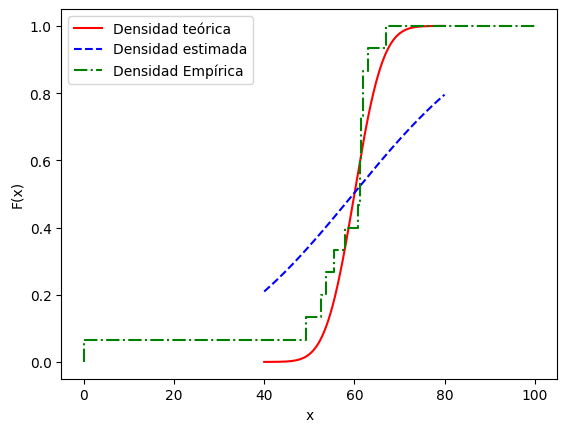

In [69]:
x = np.linspace(40, 80, 500)
plt.figure()
plt.plot(x, norm.cdf(x, loc=60, scale=5), label="Densidad teórica", color="red")
plt.plot(x, norm.cdf(x, loc=mu1, scale=sigma1), label="Densidad estimada", linestyle="--", color="blue")
plt.step(np.concatenate(([0], np.sort(x1), [100])), np.concatenate(([0], k1, [1])), label="Densidad Empírica", color="green", linestyle="-.")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.show()

Repite lo mismo pero ahora para $n=30$ y luego para $n=100$.

In [70]:
n2 = 30
x2 = np.random.normal(loc=60, scale=5, size=n2)
n3 = 100
x3 = np.random.normal(loc=60, scale=5, size=n3)
k2 = np.arange(1, n2 + 1) / n2
k3 = np.arange(1, n3 + 1) / n3

mu2, sigma2 = est1(x2), est2(x2)
mu3, sigma3 = est1(x3), est2(x3)


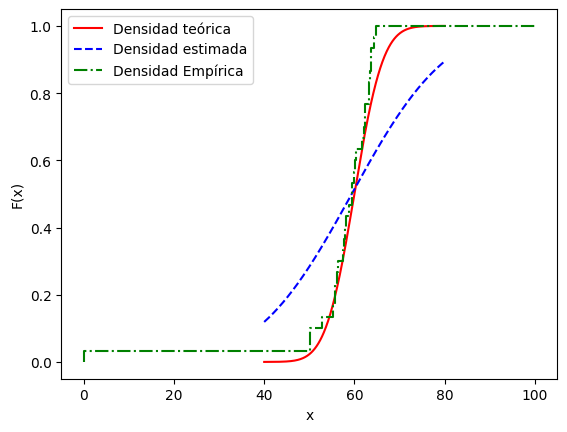

In [71]:
plt.figure()
plt.plot(x, norm.cdf(x, loc=60, scale=5), label="Densidad teórica", color="red")
plt.plot(x, norm.cdf(x, loc=mu2, scale=sigma2), label="Densidad estimada", linestyle="--", color="blue")
plt.step(np.concatenate(([0], np.sort(x2), [100])), np.concatenate(([0], k2, [1])), label="Densidad Empírica", color="green", linestyle="-.")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.show()

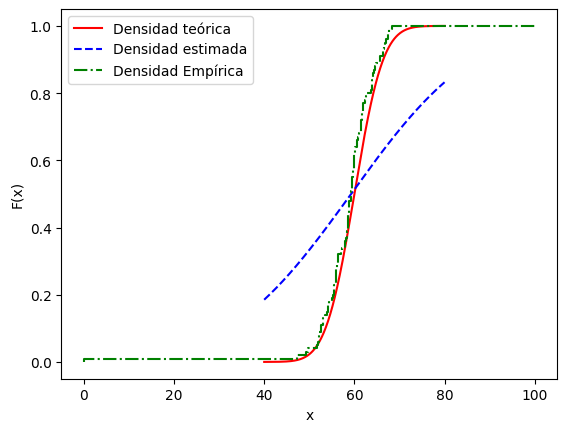

In [72]:
plt.figure()
plt.plot(x, norm.cdf(x, loc=60, scale=5), label="Densidad teórica", color="red")
plt.plot(x, norm.cdf(x, loc=mu3, scale=sigma3), label="Densidad estimada", linestyle="--", color="blue")
plt.step(np.concatenate(([0], np.sort(x3), [100])), np.concatenate(([0], k3, [1])), label="Densidad Empírica", color="green", linestyle="-.")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.show()

# Bootstrap no paramétrico
Para esta ayudantía, nos basamos en el libro de Wasserman[^1].

Haremos bootstrap no paramétrico para estimar los cuantiles 0.025 y 0.975 de una v.a. exponencial.

Sea $X\sim \mathrm{exp}(\lambda = 5)$. Iniciamos con una muestra aleatoria de $X$ con $n=300$.

[^1]: Larry Wasserman, All of Statistics, 2004

In [73]:

# Bootstrap no paramétrico. Parámetros de la distribución real
n = 300
lambda_val = 5
x = np.random.exponential(scale=1/lambda_val, size=n)


Para el bootstrap, tomaremos $K=100$ muestras de tamaño $m=30$, de las cuales obtendremos el cuantil empírico 0.025 $q_1^k$ y 0.975 $q_2^k$.

In [74]:
# Bootstrap no paramétrico. Parámetros de bootstrap
r = np.mean(x)
k = 100
m = 30
q1 = 0.025
q2 = 0.975

q1_est = np.zeros(k)
q2_est = np.zeros(k)

# Bootstrap no paramétrico. Bootstrap

for i in range(k):
    z = np.random.choice(x, size=m, replace=False)
    q1_est[i] = np.percentile(z, q=q1)
    q2_est[i] = np.percentile(z, q=q2)

Finalmente, mostramos la estimación de la media y la desviación estándar de los cuantiles $\overline{q_1}$, $\overline{q_2}$, $\mathrm{sd}(q_1)$, $\mathrm{sd}(q_2)$ obtenida por bootstrap no paramétrico.

In [75]:
# Bootstrap no paramétrico. Resultados
Q1 = np.mean(q1_est)
Q2 = np.mean(q2_est)

S1 = np.std(q1_est, ddof=1)  # ddof=1 for unbiased standard deviation
S2 = np.std(q2_est, ddof=1)

print(f"La media del cuantil {q1:.3f} es {Q1:.3f}")
print(f"La media del cuantil {q2:.3f} es {Q2:.3f}")
print(f"La desviación estándar del cuantil {q1:.3f} es {S1:.3f}")
print(f"La desviación estándar del cuantil {q2:.3f} es {S2:.3f}")

La media del cuantil 0.025 es 0.008
La media del cuantil 0.975 es 0.010
La desviación estándar del cuantil 0.025 es 0.008
La desviación estándar del cuantil 0.975 es 0.008


# Bootstrap paramétrico
Haremos bootstrap paramétrico para estimar el cuantil 0.025 y 0.975 de una muestra exponencial. Sea $X\sim \mathrm{exp}(\lambda = 5)$. Recordemos
\begin{align*}
  \mathbb{E}[X] &= \frac{1}{\lambda}
\end{align*}
Por lo que el estimador de $\lambda$ por el método de momentos es:
\begin{align}
  \hat{\lambda} &= \frac{1}{\overline{X}}
\end{align}
Iniciamos con una muestra aleatoria de $X$ con $n=300$.

In [76]:

# Bootstrap no paramétrico. Parámetros de la distribución real
n = 300
lambda_val = 5
x = np.random.exponential(scale=1/lambda_val, size=n)


Para el bootstrap, tomaremos $K=100$ muestras de tamaño $m=30$, de las cuales obtendremos el estimador por el método de momentos de cada muestra $\hat{\lambda}_k$, para posteriormente encontrar los cuantiles teórico 0.025 $q_1^k$ y 0.975 $q_2^k$..

In [77]:
# Bootstrap paramétrico. Parámetros de bootstrap
r = np.mean(x)
k = 100
m = 30
q1 = 0.025
q2 = 0.975

q1_est = np.zeros(k)
q2_est = np.zeros(k)

# Bootstrap paramétrico. Bootstrap
for i in range(k):
    z = np.random.exponential(scale=1/r, size=m)
    r_boot = np.mean(z)
    q1_est[i] = expon.ppf(q1, scale=1/r_boot)
    q2_est[i] = expon.ppf(q2, scale=1/r_boot)

Finalmente, mostramos la estimación de la media y la desviación estándar de los cuantiles $\overline{q_1}$, $\overline{q_2}$, $\mathrm{sd}(q_1)$, $\mathrm{sd}(q_2)$ obtenida por bootstrap paramétrico.

In [78]:
# Bootstrap paramétrico. Resultados

Q1 = np.mean(q1_est)
Q2 = np.mean(q2_est)

S1 = np.std(q1_est, ddof=1)  # ddof=1 for unbiased standard deviation
S2 = np.std(q2_est, ddof=1)

print(f"La media del cuantil {q1:.3f} es {Q1:.3f}")
print(f"La media del cuantil {q2:.3f} es {Q2:.3f}")
print(f"La desviación estándar del cuantil {q1:.3f} es {S1:.3f}")
print(f"La desviación estándar del cuantil {q2:.3f} es {S2:.3f}")

La media del cuantil 0.025 es 0.005
La media del cuantil 0.975 es 0.746
La desviación estándar del cuantil 0.025 es 0.001
La desviación estándar del cuantil 0.975 es 0.126


# Intervalos de confianza a partir de bootstrap paramétrico
Haremos bootstrap paramétrico para estimar intervalos del 95\% de confianza de los cuantiles 0.025 y 0.975 de una muestra exponencial.

Sea $X\sim \mathrm{exp}(\lambda = 5)$. Recordemos
\begin{align*}
  \mathbb{E}[X] &= \frac{1}{\lambda}
\end{align*}
Por lo que el estimador de $\lambda$ por el método de momentos es:
\begin{align}
  \hat{\lambda} &= \frac{1}{\overline{X}}
\end{align}
Iniciamos con una muestra aleatoria de $X$ con $n=300$.

In [79]:

# Bootstrap no paramétrico. Parámetros de la distribución real
n = 300
lambda_val = 5
x = np.random.exponential(scale=1/lambda_val, size=n)


Para el bootstrap, tomaremos $K=100$ muestras de tamaño $m=30$, de las cuales obtendremos el estimador por el método de momentos de cada muestra $\hat{\lambda}_k$, para posteriormente encontrar los cuantiles teórico 0.025 $q_1^k$ y 0.975 $q_2^k$..

In [80]:
# Bootstrap paramétrico. Parámetros de bootstrap
r = np.mean(x)
k = 100
m = 30
q1 = 0.025
q2 = 0.975

q1_est = np.zeros(k)
q2_est = np.zeros(k)

# Bootstrap paramétrico. Bootstrap

for i in range(1, k+1):
    z = np.random.exponential(scale=1/r, size=m)
    r_boot = np.mean(z)
    q1_est[i-1] = expon.ppf(q1, scale=1/r_boot)
    q2_est[i-1] = expon.ppf(q2, scale=1/r_boot)

Ahora, mostramos los intervalos de confianza por el método normal de los cuantiles $\overline{q_1}$, $\overline{q_2}$, $\mathrm{sd}(q_1)$, $\mathrm{sd}(q_2)$ obtenidos por bootstrap paramétrico.

In [81]:
# Bootstrap paramétrico. Resultados incluyendo intervalos de confianza
Q1 = np.mean(q1_est)
Q2 = np.mean(q2_est)

S1 = np.std(q1_est, ddof=1)  # ddof=1 for unbiased standard deviation
S2 = np.std(q2_est, ddof=1)

T1L = Q1 - S1 * norm.ppf(0.975)
T1R = Q1 + S1 * norm.ppf(0.975)

T2L = Q2 - S2 * norm.ppf(0.975)
T2R = Q2 + S2 * norm.ppf(0.975)

q1_real = expon.ppf(q1, scale=1/lambda_val)
q2_real = expon.ppf(q2, scale=1/lambda_val)

print("Por el método normal:")
print(f"El intervalo de confianza para el cuantil {q1:.3f} es ({T1L:.5f}, {T1R:.5f})")
if T1L < q1_real < T1R:
    print(f"El cuantil {q1:.3f} está en el intervalo de confianza")
else:
    print(f"El cuantil {q1:.3f} no está en el intervalo de confianza")

print(f"El intervalo de confianza para el cuantil {q2:.3f} es ({T2L:.5f}, {T2R:.5f})")
if T2L < q2_real < T2R:
    print(f"El cuantil {q2:.3f} está en el intervalo de confianza")
else:
    print(f"El cuantil {q2:.3f} no está en el intervalo de confianza")


Por el método normal:
El intervalo de confianza para el cuantil 0.025 es (0.00286, 0.00657)
El cuantil 0.025 está en el intervalo de confianza
El intervalo de confianza para el cuantil 0.975 es (0.41743, 0.95732)
El cuantil 0.975 está en el intervalo de confianza


Finalmente, mostramos los intervalos de confianza por el método pivotal de los cuantiles $\overline{q_1}$, $\overline{q_2}$, $\mathrm{sd}(q_1)$, $\mathrm{sd}(q_2)$ obtenidos por bootstrap paramétrico.

In [82]:

q1_N = expon.ppf(q1, scale=r)
q2_N = expon.ppf(q2, scale=r)

q1_R = np.percentile(q1_est, q=2.5)
q1_L = np.percentile(q1_est, q=97.5)
q2_R = np.percentile(q2_est, q=2.5)
q2_L = np.percentile(q2_est, q=97.5)

P1L = 2 * q1_N - q1_L
P1R = 2 * q1_N - q1_R
P2L = 2 * q2_N - q2_L
P2R = 2 * q2_N - q2_R

print("Por el método pivotal:")
print(f"El intervalo de confianza para el cuantil {q1:.3f} es ({P1L:.5f}, {P1R:.5f})")
if P1L < q1_real < P1R:
    print(f"El cuantil {q1:.3f} está en el intervalo de confianza")
else:
    print(f"El cuantil {q1:.3f} no está en el intervalo de confianza")

print(f"El intervalo de confianza para el cuantil {q2:.3f} es ({P2L:.5f}, {P2R:.5f})")
if P2L < q2_real < P2R:
    print(f"El cuantil {q2:.3f} está en el intervalo de confianza")
else:
    print(f"El cuantil {q2:.3f} no está en el intervalo de confianza")

Por el método pivotal:
El intervalo de confianza para el cuantil 0.025 es (0.00215, 0.00595)
El cuantil 0.025 está en el intervalo de confianza
El intervalo de confianza para el cuantil 0.975 es (0.31288, 0.86693)
El cuantil 0.975 está en el intervalo de confianza
